In [514]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from matplotlib.ticker import MaxNLocator, ScalarFormatter
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator
from matplotlib.legend_handler import HandlerTuple
import matplotlib.ticker as ticker
from brokenaxes import brokenaxes
import IPython
import imgkit
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [515]:
plt.rcParams['font.family'] = 'Helvetica'

## Linear Regimes with imposing linear strain rate at 0.01 mm/s

In [516]:
HDDA0_OEGDMA100 = '/Users/ningravi/Desktop/Python/RawData/CrosLink_Compression-selected/Cleaned data/0100.xlsx' 
HDDA25_OEGDMA75 = '/Users/ningravi/Desktop/Python/RawData/CrosLink_Compression-selected/Cleaned data/2575.xlsx' 
HDDA50_OEGDMA50 = '/Users/ningravi/Desktop/Python/RawData/CrosLink_Compression-selected/Cleaned data/5050.xlsx' 

In [517]:
def read_column_as_list(file, col, nrows=2400):
    return pd.read_excel(file, sheet_name='Sheet1', usecols=[col], nrows=nrows, skiprows=range(0, 2)).iloc[:, 0].tolist()

HDDA0_OEGDMA100_strain_1 = read_column_as_list(HDDA0_OEGDMA100, 2)
HDDA0_OEGDMA100_stress_1 = read_column_as_list(HDDA0_OEGDMA100, 7)
HDDA0_OEGDMA100_strain_2 = read_column_as_list(HDDA0_OEGDMA100, 9)
HDDA0_OEGDMA100_stress_2 = read_column_as_list(HDDA0_OEGDMA100, 14)

HDDA25_OEGDMA75_strain_1 = read_column_as_list(HDDA25_OEGDMA75, 2)
HDDA25_OEGDMA75_stress_1 = read_column_as_list(HDDA25_OEGDMA75, 6)
HDDA25_OEGDMA75_strain_2 = read_column_as_list(HDDA25_OEGDMA75, 8)
HDDA25_OEGDMA75_stress_2 = read_column_as_list(HDDA25_OEGDMA75, 13)
HDDA25_OEGDMA75_strain_3 = read_column_as_list(HDDA25_OEGDMA75, 15)
HDDA25_OEGDMA75_stress_3 = read_column_as_list(HDDA25_OEGDMA75, 20)

HDDA50_OEGDMA50_strain_1 = read_column_as_list(HDDA50_OEGDMA50, 2)
HDDA50_OEGDMA50_stress_1 = read_column_as_list(HDDA50_OEGDMA50, 7)
HDDA50_OEGDMA50_strain_2 = read_column_as_list(HDDA50_OEGDMA50, 9)
HDDA50_OEGDMA50_stress_2 = read_column_as_list(HDDA50_OEGDMA50, 14)
HDDA50_OEGDMA50_strain_3 = read_column_as_list(HDDA50_OEGDMA50, 16)
HDDA50_OEGDMA50_stress_3 = read_column_as_list(HDDA50_OEGDMA50, 21)

HDDA0_OEGDMA100_strain_1 = np.array(HDDA0_OEGDMA100_strain_1)
HDDA0_OEGDMA100_stress_1 = np.array(HDDA0_OEGDMA100_stress_1)
HDDA0_OEGDMA100_strain_2 = np.array(HDDA0_OEGDMA100_strain_2)
HDDA0_OEGDMA100_stress_2 = np.array(HDDA0_OEGDMA100_stress_2)

HDDA25_OEGDMA75_strain_1 = np.array(HDDA25_OEGDMA75_strain_1)
HDDA25_OEGDMA75_stress_1 = np.array(HDDA25_OEGDMA75_stress_1)
HDDA25_OEGDMA75_strain_2 = np.array(HDDA25_OEGDMA75_strain_2)
HDDA25_OEGDMA75_stress_2 = np.array(HDDA25_OEGDMA75_stress_2)
HDDA25_OEGDMA75_strain_3 = np.array(HDDA25_OEGDMA75_strain_3)
HDDA25_OEGDMA75_stress_3 = np.array(HDDA25_OEGDMA75_stress_3)

HDDA50_OEGDMA50_strain_1 = np.array(HDDA50_OEGDMA50_strain_1)
HDDA50_OEGDMA50_stress_1 = np.array(HDDA50_OEGDMA50_stress_1)
HDDA50_OEGDMA50_strain_2 = np.array(HDDA50_OEGDMA50_strain_2)
HDDA50_OEGDMA50_stress_2 = np.array(HDDA50_OEGDMA50_stress_2)
HDDA50_OEGDMA50_strain_3 = np.array(HDDA50_OEGDMA50_strain_3)
HDDA50_OEGDMA50_stress_3 = np.array(HDDA50_OEGDMA50_stress_3)


average_HDDA0_OEGDMA100_strain = (HDDA0_OEGDMA100_strain_1 + HDDA0_OEGDMA100_strain_2) / 2
min_HDDA0_OEGDMA100_strain = np.minimum(HDDA0_OEGDMA100_strain_1, HDDA0_OEGDMA100_strain_2)
max_HDDA0_OEGDMA100_strain = np.maximum(HDDA0_OEGDMA100_strain_1, HDDA0_OEGDMA100_strain_2)

average_HDDA0_OEGDMA100_stress = (HDDA0_OEGDMA100_stress_1 + HDDA0_OEGDMA100_stress_2) / 2
min_HDDA0_OEGDMA100_stress = np.minimum(HDDA0_OEGDMA100_stress_1, HDDA0_OEGDMA100_stress_2)
max_HDDA0_OEGDMA100_stress = np.maximum(HDDA0_OEGDMA100_stress_1, HDDA0_OEGDMA100_stress_2)

average_HDDA25_OEGDMA75_strain = (HDDA25_OEGDMA75_strain_1 + HDDA25_OEGDMA75_strain_2 + HDDA25_OEGDMA75_strain_3) / 3
min_HDDA25_OEGDMA75_strain = np.minimum.reduce([HDDA25_OEGDMA75_strain_1, HDDA25_OEGDMA75_strain_2, HDDA25_OEGDMA75_strain_3])
max_HDDA25_OEGDMA75_strain = np.maximum.reduce([HDDA25_OEGDMA75_strain_1, HDDA25_OEGDMA75_strain_2, HDDA25_OEGDMA75_strain_3])

average_HDDA25_OEGDMA75_stress = (HDDA25_OEGDMA75_stress_1 + HDDA25_OEGDMA75_stress_2 + HDDA25_OEGDMA75_stress_3) / 3
min_HDDA25_OEGDMA75_stress = np.minimum.reduce([HDDA25_OEGDMA75_stress_1, HDDA25_OEGDMA75_stress_2, HDDA25_OEGDMA75_stress_3])
max_HDDA25_OEGDMA75_stress = np.maximum.reduce([HDDA25_OEGDMA75_stress_1, HDDA25_OEGDMA75_stress_2, HDDA25_OEGDMA75_stress_3])

average_HDDA50_OEGDMA50_strain = (HDDA50_OEGDMA50_strain_1 + HDDA50_OEGDMA50_strain_2 + HDDA50_OEGDMA50_strain_3) / 3
min_HDDA50_OEGDMA50_strain = np.minimum.reduce([HDDA50_OEGDMA50_strain_1, HDDA50_OEGDMA50_strain_2, HDDA50_OEGDMA50_strain_3])
max_HDDA50_OEGDMA50_strain = np.maximum.reduce([HDDA50_OEGDMA50_strain_1, HDDA50_OEGDMA50_strain_2, HDDA50_OEGDMA50_strain_3])

average_HDDA50_OEGDMA50_stress = (HDDA50_OEGDMA50_stress_1 + HDDA50_OEGDMA50_stress_2 + HDDA50_OEGDMA50_stress_3) / 3
min_HDDA50_OEGDMA50_stress = np.minimum.reduce([HDDA50_OEGDMA50_stress_1, HDDA50_OEGDMA50_stress_2, HDDA50_OEGDMA50_stress_3])
max_HDDA50_OEGDMA50_stress = np.maximum.reduce([HDDA50_OEGDMA50_stress_1, HDDA50_OEGDMA50_stress_2, HDDA50_OEGDMA50_stress_3])

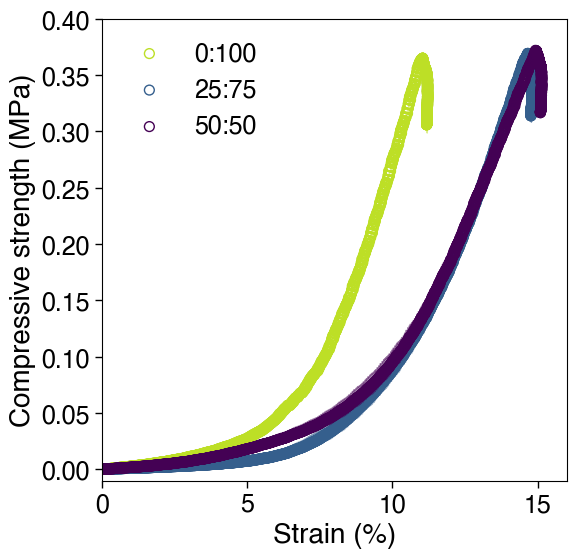

In [518]:
fig, ax = plt.subplots(figsize=(6, 6))
cmap_crosslinkers = plt.get_cmap('viridis_r')

color_HDDA0_OEGDMA100 = cmap_crosslinkers(0.1)
color_HDDA25_OEGDMA75 = cmap_crosslinkers(0.7)
color_HDDA50_OEGDMA50 = cmap_crosslinkers(1.2)

scatter_HDDA0_OEGDMA100 = ax.scatter(average_HDDA0_OEGDMA100_strain, average_HDDA0_OEGDMA100_stress*1e-6, marker='o', facecolors='none', edgecolors=color_HDDA0_OEGDMA100, 
                         s=50, linewidths=1, label='0:100')

ax.fill_between(average_HDDA0_OEGDMA100_strain, min_HDDA0_OEGDMA100_stress*1e-6, max_HDDA0_OEGDMA100_stress*1e-6, color=color_HDDA0_OEGDMA100, alpha=0.5)

scatter_HDDA25_OEGDMA75 = ax.scatter(average_HDDA25_OEGDMA75_strain, average_HDDA25_OEGDMA75_stress*1e-6, marker='o', facecolors='none', edgecolors=color_HDDA25_OEGDMA75, 
                         s=50, linewidths=1, label='25:75')

ax.fill_between(average_HDDA25_OEGDMA75_strain, min_HDDA25_OEGDMA75_stress*1e-6, max_HDDA25_OEGDMA75_stress*1e-6, color=color_HDDA25_OEGDMA75, alpha=0.5)

scatter_HDDA50_OEGDMA50 = ax.scatter(average_HDDA50_OEGDMA50_strain, average_HDDA50_OEGDMA50_stress*1e-6, marker='o', facecolors='none', edgecolors=color_HDDA50_OEGDMA50, 
                         s=50, linewidths=1, label='50:50')

ax.fill_between(average_HDDA50_OEGDMA50_strain, min_HDDA50_OEGDMA50_stress*1e-6, max_HDDA50_OEGDMA50_stress*1e-6, color=color_HDDA50_OEGDMA50, alpha=0.5)

ax.set_ylabel('Compressive strength (MPa)', fontsize=20)  
ax.set_xlabel('Strain (%)', fontsize=20)  
ax.legend(frameon=False, loc='best', fontsize=18)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=18)
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=18)
ax.set_xlim(0, 16)
ax.set_ylim(-0.01, 0.4)

#plt.savefig("Compressive strength vs strain.png", dpi=1500, bbox_inches='tight', transparent=True)

plt.show()

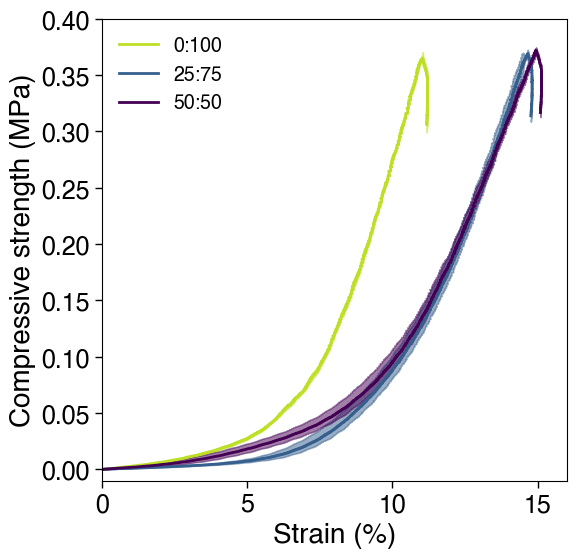

In [519]:
fig, ax = plt.subplots(figsize=(6, 6))
cmap_crosslinkers = plt.get_cmap('viridis_r')

color_HDDA0_OEGDMA100 = cmap_crosslinkers(0.1)
color_HDDA25_OEGDMA75 = cmap_crosslinkers(0.7)
color_HDDA50_OEGDMA50 = cmap_crosslinkers(1.2)

plot_HDDA0_OEGDMA100 = ax.plot(average_HDDA0_OEGDMA100_strain, average_HDDA0_OEGDMA100_stress*1e-6, color=color_HDDA0_OEGDMA100, linewidth=2, label='0:100')

ax.fill_between(average_HDDA0_OEGDMA100_strain, min_HDDA0_OEGDMA100_stress*1e-6, max_HDDA0_OEGDMA100_stress*1e-6, color=color_HDDA0_OEGDMA100, alpha=0.5)

plot_HDDA25_OEGDMA75 = ax.plot(average_HDDA25_OEGDMA75_strain, average_HDDA25_OEGDMA75_stress*1e-6, color=color_HDDA25_OEGDMA75, linewidth=2, label='25:75')

ax.fill_between(average_HDDA25_OEGDMA75_strain, min_HDDA25_OEGDMA75_stress*1e-6, max_HDDA25_OEGDMA75_stress*1e-6, color=color_HDDA25_OEGDMA75, alpha=0.5)

plot_HDDA50_OEGDMA50 = ax.plot(average_HDDA50_OEGDMA50_strain, average_HDDA50_OEGDMA50_stress*1e-6, color=color_HDDA50_OEGDMA50, linewidth=2, label='50:50')

ax.fill_between(average_HDDA50_OEGDMA50_strain, min_HDDA50_OEGDMA50_stress*1e-6, max_HDDA50_OEGDMA50_stress*1e-6, color=color_HDDA50_OEGDMA50, alpha=0.5)

ax.set_ylabel('Compressive strength (MPa)', fontsize=20)  
ax.set_xlabel('Strain (%)', fontsize=20)  
ax.legend(frameon=False, loc='best', fontsize=14)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=18)
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=18)
ax.set_xlim(0, 16)
ax.set_ylim(-0.01, 0.4)

#plt.savefig("Compressive strength vs strain.png", dpi=1500, bbox_inches='tight', transparent=True)

plt.show()

In [520]:
average_HDDA0_OEGDMA100_stress = np.array(average_HDDA0_OEGDMA100_stress)
average_HDDA0_OEGDMA100_strain = np.array(average_HDDA0_OEGDMA100_strain)
average_HDDA25_OEGDMA75_stress = np.array(average_HDDA25_OEGDMA75_stress)
average_HDDA25_OEGDMA75_strain = np.array(average_HDDA25_OEGDMA75_strain)
average_HDDA50_OEGDMA50_stress = np.array(average_HDDA50_OEGDMA50_stress)
average_HDDA50_OEGDMA50_strain = np.array(average_HDDA50_OEGDMA50_strain)

mask_HDDA0_OEGDMA100 = ~np.isnan(average_HDDA0_OEGDMA100_stress) & ~np.isnan(average_HDDA0_OEGDMA100_strain)
mask_HDDA25_OEGDMA75 = ~np.isnan(average_HDDA25_OEGDMA75_stress) & ~np.isnan(average_HDDA25_OEGDMA75_strain)
mask_HDDA50_OEGDMA50 = ~np.isnan(average_HDDA50_OEGDMA50_stress) & ~np.isnan(average_HDDA50_OEGDMA50_strain)

average_HDDA0_OEGDMA100_stress_m = average_HDDA0_OEGDMA100_stress[mask_HDDA0_OEGDMA100]
average_HDDA0_OEGDMA100_strain_m = average_HDDA0_OEGDMA100_strain[mask_HDDA0_OEGDMA100]
average_HDDA25_OEGDMA75_stress_m = average_HDDA25_OEGDMA75_stress[mask_HDDA25_OEGDMA75]
average_HDDA25_OEGDMA75_strain_m = average_HDDA25_OEGDMA75_strain[mask_HDDA25_OEGDMA75]
average_HDDA50_OEGDMA50_stress_m = average_HDDA50_OEGDMA50_stress[mask_HDDA50_OEGDMA50]
average_HDDA50_OEGDMA50_strain_m = average_HDDA50_OEGDMA50_strain[mask_HDDA50_OEGDMA50]

max_idx_HDDA0_OEGDMA100 = np.argmax(average_HDDA0_OEGDMA100_stress_m)
max_idx_HDDA25_OEGDMA75 = np.argmax(average_HDDA25_OEGDMA75_stress_m)
max_idx_HDDA50_OEGDMA50 = np.argmax(average_HDDA50_OEGDMA50_stress_m)

print(f"HDDA0:OEGDMA100 max index: {max_idx_HDDA0_OEGDMA100}, max stress: {average_HDDA0_OEGDMA100_stress[max_idx_HDDA0_OEGDMA100]}")
print(f"HDDA25:OEGDMA75 max index: {max_idx_HDDA25_OEGDMA75}, max stress: {average_HDDA25_OEGDMA75_stress[max_idx_HDDA25_OEGDMA75]}")
print(f"HDDA50:OEGDMA50 max index: {max_idx_HDDA50_OEGDMA50}, max stress: {average_HDDA50_OEGDMA50_stress[max_idx_HDDA50_OEGDMA50]}")


HDDA0:OEGDMA100 max index: 1497, max stress: 364798.84611725446
HDDA25:OEGDMA75 max index: 1887, max stress: 369046.85733477614
HDDA50:OEGDMA50 max index: 1911, max stress: 371842.8820909763


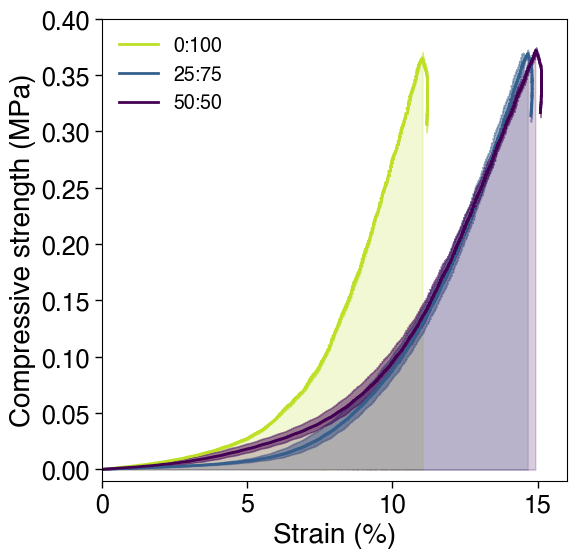

Toughness HDDA0:OEGDMA100: 0.9540549115680177
Toughness HDDA25:OEGDMA75: 1.169501357610144
Toughness HDDA50:OEGDMA50: 1.343650625645907


In [554]:
from scipy.integrate import simps

toughness_HDDA0_OEGDMA100 = simps(average_HDDA0_OEGDMA100_stress[0:max_idx_HDDA0_OEGDMA100]*1e-6, average_HDDA0_OEGDMA100_strain[0:max_idx_HDDA0_OEGDMA100])
toughness_HDDA25_OEGDMA75 = simps(average_HDDA25_OEGDMA75_stress[0:max_idx_HDDA25_OEGDMA75]*1e-6, average_HDDA25_OEGDMA75_strain[0:max_idx_HDDA25_OEGDMA75])
toughness_HDDA50_OEGDMA50 = simps(average_HDDA50_OEGDMA50_stress[0:1911]*1e-6, average_HDDA50_OEGDMA50_strain[0:1911])

# Plotting
fig, ax = plt.subplots(figsize=(6, 6))
cmap_crosslinkers = plt.get_cmap('viridis_r')

color_HDDA0_OEGDMA100 = cmap_crosslinkers(0.1)
color_HDDA25_OEGDMA75 = cmap_crosslinkers(0.7)
color_HDDA50_OEGDMA50 = cmap_crosslinkers(1.2)

# Plot data
plot_HDDA0_OEGDMA100 = ax.plot(average_HDDA0_OEGDMA100_strain, average_HDDA0_OEGDMA100_stress*1e-6, color=color_HDDA0_OEGDMA100, linewidth=2, label='0:100')
ax.fill_between(average_HDDA0_OEGDMA100_strain, min_HDDA0_OEGDMA100_stress*1e-6, max_HDDA0_OEGDMA100_stress*1e-6, color=color_HDDA0_OEGDMA100, alpha=0.5)
ax.fill_between(average_HDDA0_OEGDMA100_strain[0:max_idx_HDDA0_OEGDMA100], 0, average_HDDA0_OEGDMA100_stress[0:max_idx_HDDA0_OEGDMA100]*1e-6, color=color_HDDA0_OEGDMA100, alpha=0.2)

plot_HDDA25_OEGDMA75 = ax.plot(average_HDDA25_OEGDMA75_strain, average_HDDA25_OEGDMA75_stress*1e-6, color=color_HDDA25_OEGDMA75, linewidth=2, label='25:75')
ax.fill_between(average_HDDA25_OEGDMA75_strain, min_HDDA25_OEGDMA75_stress*1e-6, max_HDDA25_OEGDMA75_stress*1e-6, color=color_HDDA25_OEGDMA75, alpha=0.5)
ax.fill_between(average_HDDA25_OEGDMA75_strain[0:max_idx_HDDA25_OEGDMA75], 0, average_HDDA25_OEGDMA75_stress[0:max_idx_HDDA25_OEGDMA75]*1e-6, color=color_HDDA25_OEGDMA75, alpha=0.2)

plot_HDDA50_OEGDMA50 = ax.plot(average_HDDA50_OEGDMA50_strain, average_HDDA50_OEGDMA50_stress*1e-6, color=color_HDDA50_OEGDMA50, linewidth=2, label='50:50')
ax.fill_between(average_HDDA50_OEGDMA50_strain, min_HDDA50_OEGDMA50_stress*1e-6, max_HDDA50_OEGDMA50_stress*1e-6, color=color_HDDA50_OEGDMA50, alpha=0.5)
ax.fill_between(average_HDDA50_OEGDMA50_strain[0:max_idx_HDDA50_OEGDMA50], 0, average_HDDA50_OEGDMA50_stress[0:max_idx_HDDA50_OEGDMA50]*1e-6, color=color_HDDA50_OEGDMA50, alpha=0.2)

ax.set_ylabel('Compressive strength (MPa)', fontsize=20)
ax.set_xlabel('Strain (%)', fontsize=20)
ax.legend(frameon=False, loc='best', fontsize=14)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=18)
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=18)
ax.set_xlim(0, 16)
ax.set_ylim(-0.01, 0.4)

#plt.savefig("Compressive strength vs strain with Toughness.png", dpi=1500, bbox_inches='tight', transparent=True)

plt.show()

print(f"Toughness HDDA0:OEGDMA100: {toughness_HDDA0_OEGDMA100}")
print(f"Toughness HDDA25:OEGDMA75: {toughness_HDDA25_OEGDMA75}")
print(f"Toughness HDDA50:OEGDMA50: {toughness_HDDA50_OEGDMA50}")

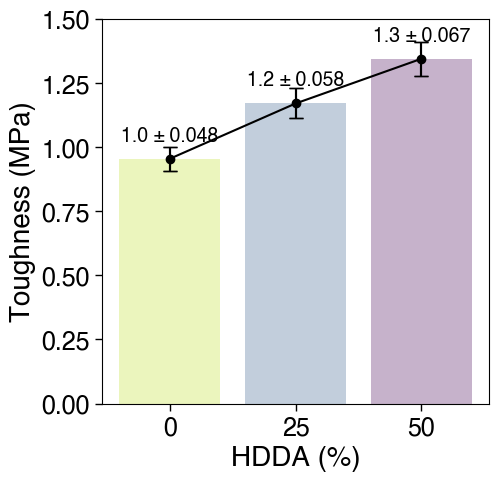

In [555]:
labels_HDDA = ['0', '25', '50']
toughness_values = [toughness_HDDA0_OEGDMA100, toughness_HDDA25_OEGDMA75, toughness_HDDA50_OEGDMA50]
errors = [0.05 * toughness for toughness in toughness_values]

fig, ax = plt.subplots(figsize=(5, 5))

bars_toughness = ax.bar(labels_HDDA, toughness_values, yerr=errors, capsize=5, 
              color=[color_HDDA0_OEGDMA100, color_HDDA25_OEGDMA75, color_HDDA50_OEGDMA50], alpha=0.3)

ax.errorbar(labels_HDDA, toughness_values, yerr=errors, fmt='o', color='black', capsize=5, linestyle='-')

ax.set_xlabel('HDDA (%)', fontsize=20)
ax.set_ylabel('Toughness (MPa)', fontsize=20)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=18)
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=18)
ax.set_ylim(0, 1.5)
for bar, slope, error in zip(bars_toughness, toughness_values, errors):
    height = bar.get_height()
    ax.annotate(f'{slope:.1f} ± {error:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
               xytext=(0, 10),  
                textcoords="offset points",
                ha='center', va='bottom', fontsize=14)

#plt.savefig("Toughness as a fx of HDDA.png", dpi=1500, bbox_inches='tight', transparent=True)

plt.show()

In [544]:
average_HDDA0_OEGDMA100_strain_LR = average_HDDA0_OEGDMA100_strain[30:250]
average_HDDA0_OEGDMA100_stress_LR = average_HDDA0_OEGDMA100_stress[30:250]

average_HDDA25_OEGDMA75_strain_LR = average_HDDA25_OEGDMA75_strain[40:300]
average_HDDA25_OEGDMA75_stress_LR = average_HDDA25_OEGDMA75_stress[40:300]

average_HDDA50_OEGDMA50_strain_LR = average_HDDA50_OEGDMA50_strain[40:300]
average_HDDA50_OEGDMA50_stress_LR = average_HDDA50_OEGDMA50_stress[40:300]

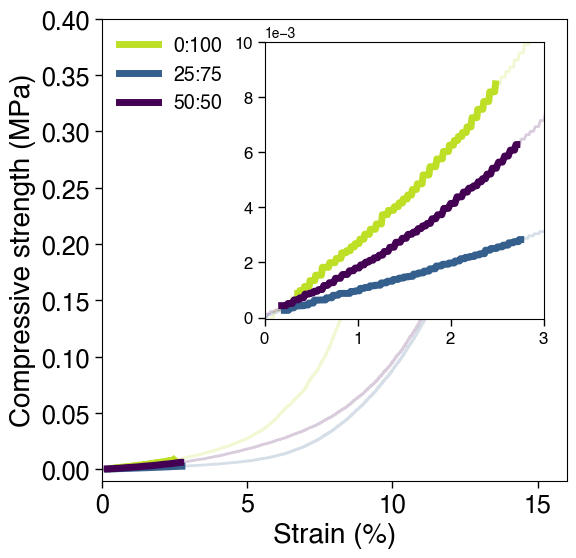

In [465]:
fig, ax = plt.subplots(figsize=(6, 6))
cmap_crosslinkers = plt.get_cmap('viridis_r')

color_HDDA0_OEGDMA100 = cmap_crosslinkers(0.1)
color_HDDA25_OEGDMA75 = cmap_crosslinkers(0.7)
color_HDDA50_OEGDMA50 = cmap_crosslinkers(1.2)

plot_HDDA0_OEGDMA100 = ax.plot(average_HDDA0_OEGDMA100_strain, average_HDDA0_OEGDMA100_stress*1e-6, color=color_HDDA0_OEGDMA100, linewidth=2, alpha=0.2)#, label='0:100')

plot_HDDA0_OEGDMA100_LR = ax.plot(average_HDDA0_OEGDMA100_strain_LR, average_HDDA0_OEGDMA100_stress_LR*1e-6, color=color_HDDA0_OEGDMA100, linewidth=5,  linestyle='-', label='0:100')

plot_HDDA25_OEGDMA75 = ax.plot(average_HDDA25_OEGDMA75_strain, average_HDDA25_OEGDMA75_stress*1e-6, color=color_HDDA25_OEGDMA75, linewidth=2, alpha=0.2)# label='25:75')

plot_HDDA25_OEGDMA75_LR = ax.plot(average_HDDA25_OEGDMA75_strain_LR, average_HDDA25_OEGDMA75_stress_LR*1e-6, color=color_HDDA25_OEGDMA75, linewidth=5,  linestyle='-', label='25:75')

plot_HDDA50_OEGDMA50 = ax.plot(average_HDDA50_OEGDMA50_strain, average_HDDA50_OEGDMA50_stress*1e-6, color=color_HDDA50_OEGDMA50, linewidth=2, alpha=0.2)#label='50:50')

plot_HDDA50_OEGDMA50_LR = ax.plot(average_HDDA50_OEGDMA50_strain_LR, average_HDDA50_OEGDMA50_stress_LR*1e-6, color=color_HDDA50_OEGDMA50, linewidth=5,  linestyle='-', label='50:50')

inset_ax = ax.inset_axes([0.35, 0.35, 0.6, 0.6]) 

inset_ax.plot(average_HDDA0_OEGDMA100_strain, average_HDDA0_OEGDMA100_stress*1e-6, color=color_HDDA0_OEGDMA100, linewidth=2, alpha=0.2)
inset_ax.plot(average_HDDA0_OEGDMA100_strain_LR, average_HDDA0_OEGDMA100_stress_LR*1e-6, color=color_HDDA0_OEGDMA100,  linestyle='-', linewidth=5)

inset_ax.plot(average_HDDA25_OEGDMA75_strain, average_HDDA25_OEGDMA75_stress*1e-6, color=color_HDDA25_OEGDMA75, linewidth=2, alpha=0.2)
inset_ax.plot(average_HDDA25_OEGDMA75_strain_LR, average_HDDA25_OEGDMA75_stress_LR*1e-6, color=color_HDDA25_OEGDMA75,  linestyle='-', linewidth=5)

inset_ax.plot(average_HDDA50_OEGDMA50_strain, average_HDDA50_OEGDMA50_stress*1e-6, color=color_HDDA50_OEGDMA50, linewidth=2, alpha=0.2)
inset_ax.plot(average_HDDA50_OEGDMA50_strain_LR, average_HDDA50_OEGDMA50_stress_LR*1e-6, color=color_HDDA50_OEGDMA50,  linestyle='-', linewidth=5)
inset_ax.set_xlim(0, 3)
inset_ax.set_ylim(-0.00005, 0.01)
inset_ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=12)
inset_ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=12)
formatter = ScalarFormatter()
formatter.set_powerlimits((-3, -3))  
inset_ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('Compressive strength (MPa)', fontsize=20) 
ax.set_xlabel('Strain (%)', fontsize=20)  
ax.legend(frameon=False, loc='best', fontsize=14)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=18)
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=18)
ax.set_xlim(0, 16)
ax.set_ylim(-0.01, 0.4)

#plt.savefig("Compressive strength vs strain Toe region.png", dpi=1500, bbox_inches='tight', transparent=True)

plt.show()

HDDA0:OEGDMA100 - Slope: 3414.9961309305763, Intercept: -617.4514817894234, R^2: 0.991914199596806
HDDA25:OEGDMA75 - Slope: 992.7928580054354, Intercept: 11.868880546540026, R^2: 0.9967044995611446
HDDA50:OEGDMA50 - Slope: 2273.281782546007, Intercept: -377.9204728513474, R^2: 0.9886979332692326


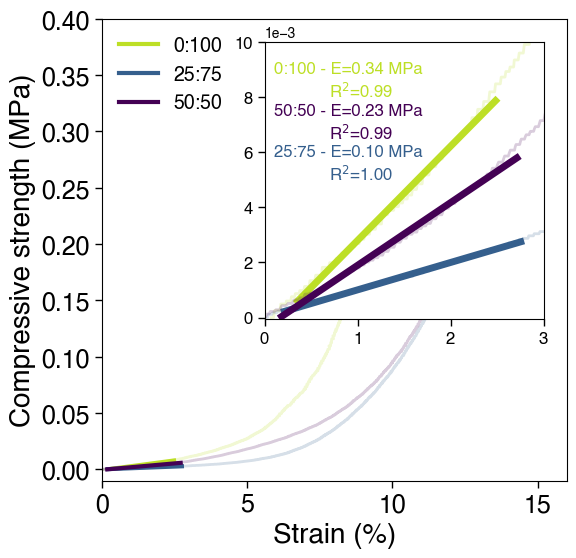

In [468]:
def linear_func(x, a, b):
    return a * x + b

params_HDDA0_OEGDMA100, _ = curve_fit(linear_func, average_HDDA0_OEGDMA100_strain_LR, average_HDDA0_OEGDMA100_stress_LR)
params_HDDA25_OEGDMA75, _ = curve_fit(linear_func, average_HDDA25_OEGDMA75_strain_LR, average_HDDA25_OEGDMA75_stress_LR)
params_HDDA50_OEGDMA50, _ = curve_fit(linear_func, average_HDDA50_OEGDMA50_strain_LR, average_HDDA50_OEGDMA50_stress_LR)

r2_HDDA0_OEGDMA100 = r2_score(average_HDDA0_OEGDMA100_stress_LR, linear_func(average_HDDA0_OEGDMA100_strain_LR, *params_HDDA0_OEGDMA100))
r2_HDDA25_OEGDMA75 = r2_score(average_HDDA25_OEGDMA75_stress_LR, linear_func(average_HDDA25_OEGDMA75_strain_LR, *params_HDDA25_OEGDMA75))
r2_HDDA50_OEGDMA50 = r2_score(average_HDDA50_OEGDMA50_stress_LR, linear_func(average_HDDA50_OEGDMA50_strain_LR, *params_HDDA50_OEGDMA50))

residuals_HDDA0_OEGDMA100 = average_HDDA0_OEGDMA100_stress_LR - linear_func(average_HDDA0_OEGDMA100_strain_LR, *params_HDDA0_OEGDMA100)
residuals_HDDA25_OEGDMA75 = average_HDDA25_OEGDMA75_stress_LR - linear_func(average_HDDA25_OEGDMA75_strain_LR, *params_HDDA25_OEGDMA75)
residuals_HDDA50_OEGDMA50 = average_HDDA50_OEGDMA50_stress_LR - linear_func(average_HDDA50_OEGDMA50_strain_LR, *params_HDDA50_OEGDMA50)

std_dev_HDDA0_OEGDMA100 = np.std(residuals_HDDA0_OEGDMA100*1e-6)
std_dev_HDDA25_OEGDMA75 = np.std(residuals_HDDA25_OEGDMA75*1e-6)
std_dev_HDDA50_OEGDMA50 = np.std(residuals_HDDA50_OEGDMA50*1e-6)

print(f"HDDA0:OEGDMA100 - Slope: {params_HDDA0_OEGDMA100[0]}, Intercept: {params_HDDA0_OEGDMA100[1]}, R^2: {r2_HDDA0_OEGDMA100}")
print(f"HDDA25:OEGDMA75 - Slope: {params_HDDA25_OEGDMA75[0]}, Intercept: {params_HDDA25_OEGDMA75[1]}, R^2: {r2_HDDA25_OEGDMA75}")
print(f"HDDA50:OEGDMA50 - Slope: {params_HDDA50_OEGDMA50[0]}, Intercept: {params_HDDA50_OEGDMA50[1]}, R^2: {r2_HDDA50_OEGDMA50}")

fig, ax = plt.subplots(figsize=(6, 6))
cmap_crosslinkers = plt.get_cmap('viridis_r')

color_HDDA0_OEGDMA100 = cmap_crosslinkers(0.1)
color_HDDA25_OEGDMA75 = cmap_crosslinkers(0.7)
color_HDDA50_OEGDMA50 = cmap_crosslinkers(1.2)

plot_HDDA0_OEGDMA100 = ax.plot(average_HDDA0_OEGDMA100_strain, average_HDDA0_OEGDMA100_stress*1e-6, color=color_HDDA0_OEGDMA100, linewidth=2, alpha=0.2)
#plot_HDDA0_OEGDMA100_LR = ax.plot(average_HDDA0_OEGDMA100_strain_LR, average_HDDA0_OEGDMA100_stress_LR*1e-6, color=color_HDDA0_OEGDMA100, linewidth=5, label='0:100')

plot_HDDA25_OEGDMA75 = ax.plot(average_HDDA25_OEGDMA75_strain, average_HDDA25_OEGDMA75_stress*1e-6, color=color_HDDA25_OEGDMA75, linewidth=2, alpha=0.2)
#plot_HDDA25_OEGDMA75_LR = ax.plot(average_HDDA25_OEGDMA75_strain_LR, average_HDDA25_OEGDMA75_stress_LR*1e-6, color=color_HDDA25_OEGDMA75, linewidth=5, label='25:75')

plot_HDDA50_OEGDMA50 = ax.plot(average_HDDA50_OEGDMA50_strain, average_HDDA50_OEGDMA50_stress*1e-6, color=color_HDDA50_OEGDMA50, linewidth=2, alpha=0.2)
#plot_HDDA50_OEGDMA50_LR = ax.plot(average_HDDA50_OEGDMA50_strain_LR, average_HDDA50_OEGDMA50_stress_LR*1e-6, color=color_HDDA50_OEGDMA50, linewidth=5, label='50:50')


x_fit_HDDA0_OEGDMA100 = np.linspace(min(average_HDDA0_OEGDMA100_strain_LR), max(average_HDDA0_OEGDMA100_strain_LR), 100)
x_fit_HDDA25_OEGDMA75 = np.linspace(min(average_HDDA25_OEGDMA75_strain_LR), max(average_HDDA25_OEGDMA75_strain_LR), 100)
x_fit_HDDA50_OEGDMA50 = np.linspace(min(average_HDDA50_OEGDMA50_strain_LR), max(average_HDDA50_OEGDMA50_strain_LR), 100)

ax.plot(x_fit_HDDA0_OEGDMA100, linear_func(x_fit_HDDA0_OEGDMA100, *params_HDDA0_OEGDMA100)*1e-6, color=color_HDDA0_OEGDMA100, linestyle='-', linewidth=3, label='0:100')
ax.plot(x_fit_HDDA25_OEGDMA75, linear_func(x_fit_HDDA25_OEGDMA75, *params_HDDA25_OEGDMA75)*1e-6, color=color_HDDA25_OEGDMA75, linestyle='-', linewidth=3, label='25:75')
ax.plot(x_fit_HDDA50_OEGDMA50, linear_func(x_fit_HDDA50_OEGDMA50, *params_HDDA50_OEGDMA50)*1e-6, color=color_HDDA50_OEGDMA50, linestyle='-', linewidth=3, label='50:50')

inset_ax = ax.inset_axes([0.35, 0.35, 0.6, 0.6])

inset_ax.plot(average_HDDA0_OEGDMA100_strain, average_HDDA0_OEGDMA100_stress*1e-6, color=color_HDDA0_OEGDMA100, linewidth=2, alpha=0.2)
inset_ax.plot(x_fit_HDDA0_OEGDMA100, linear_func(x_fit_HDDA0_OEGDMA100, *params_HDDA0_OEGDMA100)*1e-6, color=color_HDDA0_OEGDMA100, linewidth=5)
inset_ax.plot(average_HDDA25_OEGDMA75_strain, average_HDDA25_OEGDMA75_stress*1e-6, color=color_HDDA25_OEGDMA75, linewidth=2, alpha=0.2)
inset_ax.plot(x_fit_HDDA25_OEGDMA75, linear_func(x_fit_HDDA25_OEGDMA75, *params_HDDA25_OEGDMA75)*1e-6, color=color_HDDA25_OEGDMA75, linewidth=5)

inset_ax.plot(average_HDDA50_OEGDMA50_strain, average_HDDA50_OEGDMA50_stress*1e-6, color=color_HDDA50_OEGDMA50, linewidth=2, alpha=0.2)
inset_ax.plot(x_fit_HDDA50_OEGDMA50, linear_func(x_fit_HDDA50_OEGDMA50, *params_HDDA50_OEGDMA50)*1e-6, color=color_HDDA50_OEGDMA50, linewidth=5)

inset_ax.set_xlim(0, 3)
inset_ax.set_ylim(-0.00005, 0.01)
inset_ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=12)
inset_ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=12)
formatter = ScalarFormatter()
formatter.set_powerlimits((-3, -3))  
inset_ax.yaxis.set_major_formatter(formatter)

inset_ax.text(0.1, 8*1e-3, f'0:100 - E={params_HDDA0_OEGDMA100[0]*100*1e-6:.2f} MPa\n            R$^2$={r2_HDDA0_OEGDMA100:.2f}', fontsize=12, color=color_HDDA0_OEGDMA100)
inset_ax.text(0.1, 6.5*1e-3, f'50:50 - E={params_HDDA50_OEGDMA50[0]*100*1e-6:.2f} MPa\n            R$^2$={r2_HDDA50_OEGDMA50:.2f}', fontsize=12, color=color_HDDA50_OEGDMA50)
inset_ax.text(0.1, 5*1e-3, f'25:75 - E={params_HDDA25_OEGDMA75[0]*100*1e-6:.2f} MPa\n            R$^2$={r2_HDDA25_OEGDMA75:.2f}', fontsize=12, color=color_HDDA25_OEGDMA75)

ax.set_ylabel('Compressive strength (MPa)', fontsize=20) 
ax.set_xlabel('Strain (%)', fontsize=20)
ax.legend(frameon=False, loc='best', fontsize=14)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=18)
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=18)
ax.set_xlim(0, 16)
ax.set_ylim(-0.01, 0.4)

#plt.savefig("Compressive strength vs strain Toe region Fitting.png", dpi=1500, bbox_inches='tight', transparent=True)
#plt.savefig("Compressive strength vs strain Toe region Fitting labels.png", dpi=1500, bbox_inches='tight', transparent=True)

plt.show()

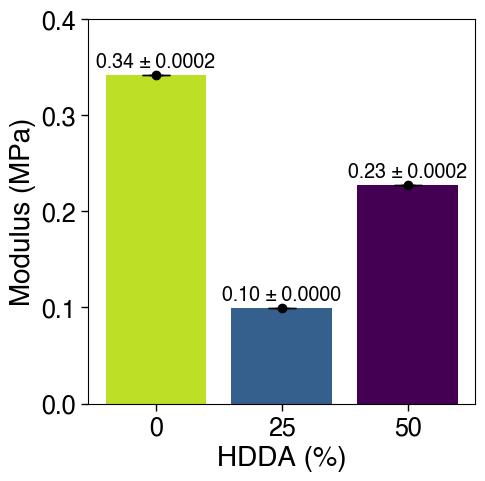

In [558]:
labels_HDDA_toe = ['0', '25', '50']
E_toe = [params_HDDA0_OEGDMA100[0]*100*1e-6, params_HDDA25_OEGDMA75[0]*100*1e-6, params_HDDA50_OEGDMA50[0]*100*1e-6]
errors_toe = [std_dev_HDDA0_OEGDMA100, std_dev_HDDA25_OEGDMA75, std_dev_HDDA50_OEGDMA50]

fig, ax = plt.subplots(figsize=(5, 5))
bars_toe = ax.bar(labels_HDDA_toe, E_toe, yerr=errors_toe, capsize=10, 
              color=[color_HDDA0_OEGDMA100, color_HDDA25_OEGDMA75, color_HDDA50_OEGDMA50], alpha=1)

ax.errorbar(labels_HDDA_toe, E_toe, yerr=errors_toe, fmt='o', color='black', capsize=5, linestyle='None')

ax.set_xlabel('HDDA (%)', fontsize=20)
ax.set_ylabel('Modulus (MPa)', fontsize=20)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=18)
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=18)
ax.set_ylim(0, 0.4)
for bar, slope, error in zip(bars_toe, E_toe, errors_toe):
    height = bar.get_height()
    ax.annotate(f'{slope:.2f} ± {error:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom', fontsize=14)

#plt.savefig("Toe region Strengths Bar.png", dpi=1500, bbox_inches='tight', transparent=True)

plt.show()

In [347]:
average_HDDA0_OEGDMA100_strain_H = average_HDDA0_OEGDMA100_strain[250:1000]
average_HDDA0_OEGDMA100_stress_H = average_HDDA0_OEGDMA100_stress[250:1000]

average_HDDA25_OEGDMA75_strain_H = average_HDDA25_OEGDMA75_strain[300:1300]
average_HDDA25_OEGDMA75_stress_H = average_HDDA25_OEGDMA75_stress[300:1300]

average_HDDA50_OEGDMA50_strain_H = average_HDDA50_OEGDMA50_strain[300:1300]
average_HDDA50_OEGDMA50_stress_H = average_HDDA50_OEGDMA50_stress[300:1300]

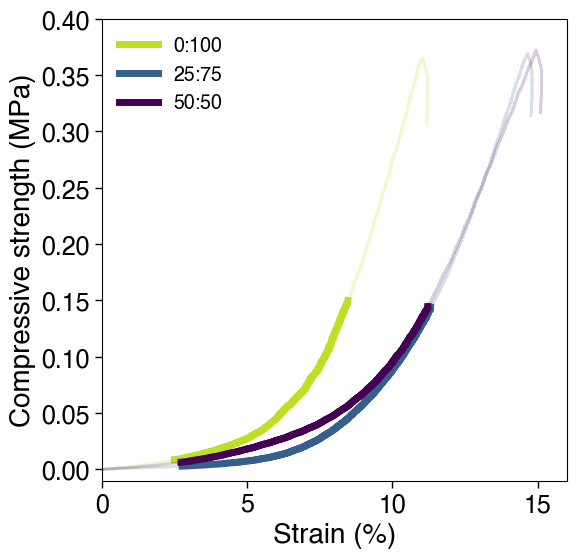

In [470]:
fig, ax = plt.subplots(figsize=(6, 6))
cmap_crosslinkers = plt.get_cmap('viridis_r')

color_HDDA0_OEGDMA100 = cmap_crosslinkers(0.1)
color_HDDA25_OEGDMA75 = cmap_crosslinkers(0.7)
color_HDDA50_OEGDMA50 = cmap_crosslinkers(1.2)

plot_HDDA0_OEGDMA100 = ax.plot(average_HDDA0_OEGDMA100_strain, average_HDDA0_OEGDMA100_stress*1e-6, color=color_HDDA0_OEGDMA100, linewidth=2, alpha=0.2)#, label='0:100')

plot_HDDA0_OEGDMA100_LR = ax.plot(average_HDDA0_OEGDMA100_strain_H, average_HDDA0_OEGDMA100_stress_H*1e-6, color=color_HDDA0_OEGDMA100, linewidth=5, label='0:100')

plot_HDDA25_OEGDMA75 = ax.plot(average_HDDA25_OEGDMA75_strain, average_HDDA25_OEGDMA75_stress*1e-6, color=color_HDDA25_OEGDMA75, linewidth=2, alpha=0.2)# label='25:75')

plot_HDDA25_OEGDMA75_LR = ax.plot(average_HDDA25_OEGDMA75_strain_H, average_HDDA25_OEGDMA75_stress_H*1e-6, color=color_HDDA25_OEGDMA75, linewidth=5, label='25:75')

plot_HDDA50_OEGDMA50 = ax.plot(average_HDDA50_OEGDMA50_strain, average_HDDA50_OEGDMA50_stress*1e-6, color=color_HDDA50_OEGDMA50, linewidth=2, alpha=0.2)#label='50:50')

plot_HDDA50_OEGDMA50_LR = ax.plot(average_HDDA50_OEGDMA50_strain_H, average_HDDA50_OEGDMA50_stress_H*1e-6, color=color_HDDA50_OEGDMA50, linewidth=5, label='50:50')

ax.set_ylabel('Compressive strength (MPa)', fontsize=20) 
ax.set_xlabel('Strain (%)', fontsize=20)  
ax.legend(frameon=False, loc='best', fontsize=14)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=18)
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=18)
ax.set_xlim(0, 16)
ax.set_ylim(-0.01, 0.4)

#plt.savefig("Compressive strength vs strain Heel region.png", dpi=1500, bbox_inches='tight', transparent=True)

plt.show()

In [471]:
average_HDDA0_OEGDMA100_strain_LR_II = average_HDDA0_OEGDMA100_strain[1000:1450]
average_HDDA0_OEGDMA100_stress_LR_II = average_HDDA0_OEGDMA100_stress[1000:1450]

average_HDDA25_OEGDMA75_strain_LR_II = average_HDDA25_OEGDMA75_strain[1300:1850]
average_HDDA25_OEGDMA75_stress_LR_II = average_HDDA25_OEGDMA75_stress[1300:1850]

average_HDDA50_OEGDMA50_strain_LR_II = average_HDDA50_OEGDMA50_strain[1300:1890]
average_HDDA50_OEGDMA50_stress_LR_II = average_HDDA50_OEGDMA50_stress[1300:1890]

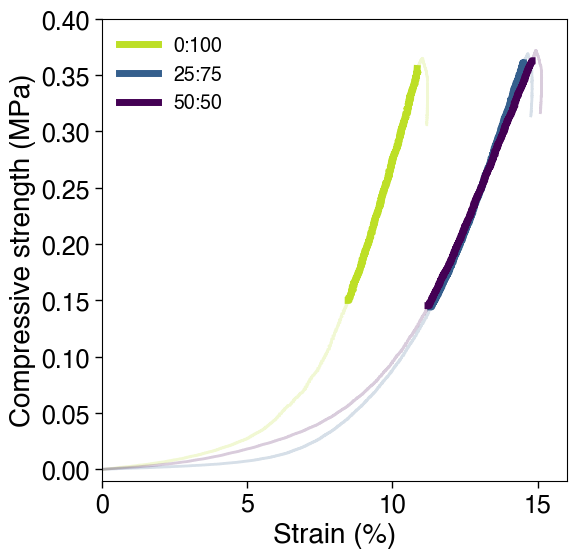

In [472]:
fig, ax = plt.subplots(figsize=(6, 6))
cmap_crosslinkers = plt.get_cmap('viridis_r')

color_HDDA0_OEGDMA100 = cmap_crosslinkers(0.1)
color_HDDA25_OEGDMA75 = cmap_crosslinkers(0.7)
color_HDDA50_OEGDMA50 = cmap_crosslinkers(1.2)

plot_HDDA0_OEGDMA100 = ax.plot(average_HDDA0_OEGDMA100_strain, average_HDDA0_OEGDMA100_stress*1e-6, color=color_HDDA0_OEGDMA100, linewidth=2, alpha=0.2)#, label='0:100')

plot_HDDA0_OEGDMA100_LR = ax.plot(average_HDDA0_OEGDMA100_strain_LR_II, average_HDDA0_OEGDMA100_stress_LR_II*1e-6, color=color_HDDA0_OEGDMA100, linewidth=5, label='0:100')

plot_HDDA25_OEGDMA75 = ax.plot(average_HDDA25_OEGDMA75_strain, average_HDDA25_OEGDMA75_stress*1e-6, color=color_HDDA25_OEGDMA75, linewidth=2, alpha=0.2)# label='25:75')

plot_HDDA25_OEGDMA75_LR = ax.plot(average_HDDA25_OEGDMA75_strain_LR_II, average_HDDA25_OEGDMA75_stress_LR_II*1e-6, color=color_HDDA25_OEGDMA75, linewidth=5, label='25:75')

plot_HDDA50_OEGDMA50 = ax.plot(average_HDDA50_OEGDMA50_strain, average_HDDA50_OEGDMA50_stress*1e-6, color=color_HDDA50_OEGDMA50, linewidth=2, alpha=0.2)#label='50:50')

plot_HDDA50_OEGDMA50_LR = ax.plot(average_HDDA50_OEGDMA50_strain_LR_II, average_HDDA50_OEGDMA50_stress_LR_II*1e-6, color=color_HDDA50_OEGDMA50, linewidth=5, label='50:50')

ax.set_ylabel('Compressive strength (MPa)', fontsize=20) 
ax.set_xlabel('Strain (%)', fontsize=20)  
ax.legend(frameon=False, loc='best', fontsize=14)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=18)
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=18)
ax.set_xlim(0, 16)
ax.set_ylim(-0.01, 0.4)

#plt.savefig("Compressive strength vs strain linear region.png", dpi=1500, bbox_inches='tight', transparent=True)

plt.show()

HDDA0:OEGDMA100 - Slope: 86176.55957285, Intercept: -587036.6271011609, R^2: 0.998102579925548
HDDA25:OEGDMA75 - Slope: 69551.7141301358, Intercept: -654002.1797946871, R^2: 0.9962826030707703
HDDA50:OEGDMA50 - Slope: 62254.30097452297, Intercept: -560538.4255713769, R^2: 0.9988364001609166


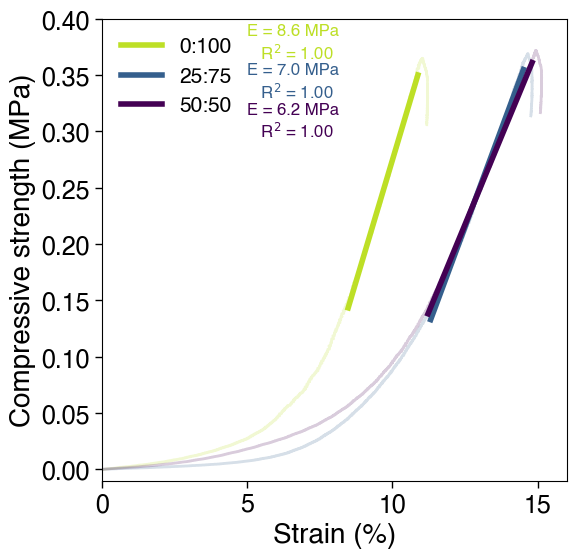

In [473]:
def linear_func(x, a, b):
    return a * x + b

params_HDDA0_OEGDMA100_II, _ = curve_fit(linear_func, average_HDDA0_OEGDMA100_strain_LR_II, average_HDDA0_OEGDMA100_stress_LR_II)
params_HDDA25_OEGDMA75_II, _ = curve_fit(linear_func, average_HDDA25_OEGDMA75_strain_LR_II, average_HDDA25_OEGDMA75_stress_LR_II)
params_HDDA50_OEGDMA50_II, _ = curve_fit(linear_func, average_HDDA50_OEGDMA50_strain_LR_II, average_HDDA50_OEGDMA50_stress_LR_II)

r2_HDDA0_OEGDMA100_II = r2_score(average_HDDA0_OEGDMA100_stress_LR_II, linear_func(average_HDDA0_OEGDMA100_strain_LR_II, *params_HDDA0_OEGDMA100_II))
r2_HDDA25_OEGDMA75_II = r2_score(average_HDDA25_OEGDMA75_stress_LR_II, linear_func(average_HDDA25_OEGDMA75_strain_LR_II, *params_HDDA25_OEGDMA75_II))
r2_HDDA50_OEGDMA50_II = r2_score(average_HDDA50_OEGDMA50_stress_LR_II, linear_func(average_HDDA50_OEGDMA50_strain_LR_II, *params_HDDA50_OEGDMA50_II))

residuals_HDDA0_OEGDMA100_II = average_HDDA0_OEGDMA100_stress_LR_II - linear_func(average_HDDA0_OEGDMA100_strain_LR_II, *params_HDDA0_OEGDMA100_II)
residuals_HDDA25_OEGDMA75_II = average_HDDA25_OEGDMA75_stress_LR_II - linear_func(average_HDDA25_OEGDMA75_strain_LR_II, *params_HDDA25_OEGDMA75_II)
residuals_HDDA50_OEGDMA50_II = average_HDDA50_OEGDMA50_stress_LR_II - linear_func(average_HDDA50_OEGDMA50_strain_LR_II, *params_HDDA50_OEGDMA50_II)

std_dev_HDDA0_OEGDMA100_II = np.std(residuals_HDDA0_OEGDMA100_II*1e-6)
std_dev_HDDA25_OEGDMA75_II = np.std(residuals_HDDA25_OEGDMA75_II*1e-6)
std_dev_HDDA50_OEGDMA50_II = np.std(residuals_HDDA50_OEGDMA50_II*1e-6)

print(f"HDDA0:OEGDMA100 - Slope: {params_HDDA0_OEGDMA100_II[0]}, Intercept: {params_HDDA0_OEGDMA100_II[1]}, R^2: {r2_HDDA0_OEGDMA100_II}")
print(f"HDDA25:OEGDMA75 - Slope: {params_HDDA25_OEGDMA75_II[0]}, Intercept: {params_HDDA25_OEGDMA75_II[1]}, R^2: {r2_HDDA25_OEGDMA75_II}")
print(f"HDDA50:OEGDMA50 - Slope: {params_HDDA50_OEGDMA50_II[0]}, Intercept: {params_HDDA50_OEGDMA50_II[1]}, R^2: {r2_HDDA50_OEGDMA50_II}")

fig, ax = plt.subplots(figsize=(6, 6))
cmap_crosslinkers = plt.get_cmap('viridis_r')

color_HDDA0_OEGDMA100 = cmap_crosslinkers(0.1)
color_HDDA25_OEGDMA75 = cmap_crosslinkers(0.7)
color_HDDA50_OEGDMA50 = cmap_crosslinkers(1.2)

plot_HDDA0_OEGDMA100_II = ax.plot(average_HDDA0_OEGDMA100_strain, average_HDDA0_OEGDMA100_stress*1e-6, color=color_HDDA0_OEGDMA100, linewidth=2, alpha=0.2)
#plot_HDDA0_OEGDMA100_LR = ax.plot(average_HDDA0_OEGDMA100_strain_LR, average_HDDA0_OEGDMA100_stress_LR*1e-6, color=color_HDDA0_OEGDMA100, linewidth=5, label='0:100')

plot_HDDA25_OEGDMA75_II = ax.plot(average_HDDA25_OEGDMA75_strain, average_HDDA25_OEGDMA75_stress*1e-6, color=color_HDDA25_OEGDMA75, linewidth=2, alpha=0.2)
#plot_HDDA25_OEGDMA75_LR = ax.plot(average_HDDA25_OEGDMA75_strain_LR, average_HDDA25_OEGDMA75_stress_LR*1e-6, color=color_HDDA25_OEGDMA75, linewidth=5, label='25:75')

plot_HDDA50_OEGDMA50_II = ax.plot(average_HDDA50_OEGDMA50_strain, average_HDDA50_OEGDMA50_stress*1e-6, color=color_HDDA50_OEGDMA50, linewidth=2, alpha=0.2)
#plot_HDDA50_OEGDMA50_LR = ax.plot(average_HDDA50_OEGDMA50_strain_LR, average_HDDA50_OEGDMA50_stress_LR*1e-6, color=color_HDDA50_OEGDMA50, linewidth=5, label='50:50')


x_fit_HDDA0_OEGDMA100_II = np.linspace(min(average_HDDA0_OEGDMA100_strain_LR_II), max(average_HDDA0_OEGDMA100_strain_LR_II), 100)
x_fit_HDDA25_OEGDMA75_II = np.linspace(min(average_HDDA25_OEGDMA75_strain_LR_II), max(average_HDDA25_OEGDMA75_strain_LR_II), 100)
x_fit_HDDA50_OEGDMA50_II = np.linspace(min(average_HDDA50_OEGDMA50_strain_LR_II), max(average_HDDA50_OEGDMA50_strain_LR_II), 100)

ax.plot(x_fit_HDDA0_OEGDMA100_II, linear_func(x_fit_HDDA0_OEGDMA100_II, *params_HDDA0_OEGDMA100_II)*1e-6, color=color_HDDA0_OEGDMA100, linestyle='-', linewidth=4, label='0:100')
ax.plot(x_fit_HDDA25_OEGDMA75_II, linear_func(x_fit_HDDA25_OEGDMA75_II, *params_HDDA25_OEGDMA75_II)*1e-6, color=color_HDDA25_OEGDMA75, linestyle='-', linewidth=4, label='25:75')
ax.plot(x_fit_HDDA50_OEGDMA50_II, linear_func(x_fit_HDDA50_OEGDMA50_II, *params_HDDA50_OEGDMA50_II)*1e-6, color=color_HDDA50_OEGDMA50, linestyle='-', linewidth=4, label='50:50')


ax.text(5, 0.365, f'E = {params_HDDA0_OEGDMA100_II[0]*100*1e-6:.1f} MPa\n   R$^2$ = {r2_HDDA0_OEGDMA100_II:.2f}', fontsize=12, color=color_HDDA0_OEGDMA100)
ax.text(5, 0.33, f'E = {params_HDDA25_OEGDMA75_II[0]*100*1e-6:.1f} MPa\n   R$^2$ = {r2_HDDA25_OEGDMA75_II:.2f}', fontsize=12, color=color_HDDA25_OEGDMA75)
ax.text(5, 0.295, f'E = {params_HDDA50_OEGDMA50_II[0]*100*1e-6:.1f} MPa\n   R$^2$ = {r2_HDDA50_OEGDMA50_II:.2f}', fontsize=12, color=color_HDDA50_OEGDMA50)

ax.set_ylabel('Compressive strength (MPa)', fontsize=20) 
ax.set_xlabel('Strain (%)', fontsize=20)
ax.legend(frameon=False, loc='best', fontsize=15)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=18)
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=18)
ax.set_xlim(0, 16)
ax.set_ylim(-0.01, 0.4)

#plt.savefig("Compressive strength vs strain linear region fitting.png", dpi=1500, bbox_inches='tight', transparent=True)

plt.show()

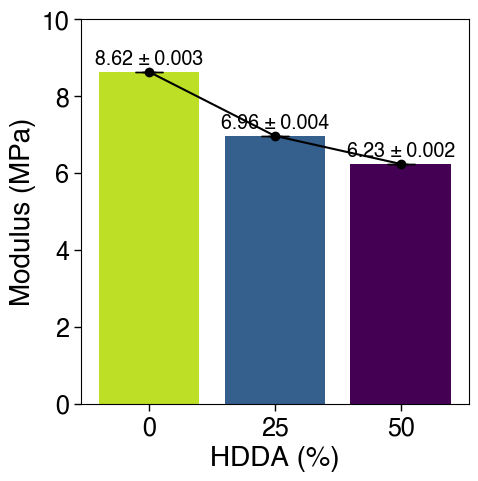

In [562]:
labels_HDDA_II = ['0', '25', '50']
E_II = [params_HDDA0_OEGDMA100_II[0]*100*1e-6, params_HDDA25_OEGDMA75_II[0]*100*1e-6, params_HDDA50_OEGDMA50_II[0]*100*1e-6]
errors_II = [std_dev_HDDA0_OEGDMA100_II, std_dev_HDDA25_OEGDMA75_II, std_dev_HDDA50_OEGDMA50_II]

fig, ax = plt.subplots(figsize=(5, 5))
bars_II = ax.bar(labels_HDDA_II, E_II, yerr=errors_II, capsize=10, 
              color=[color_HDDA0_OEGDMA100, color_HDDA25_OEGDMA75, color_HDDA50_OEGDMA50], alpha=1)

ax.errorbar(labels_HDDA_II, E_II, yerr=errors_II, fmt='o', color='black', capsize=5, linestyle='-')

ax.set_xlabel('HDDA (%)', fontsize=20)
ax.set_ylabel('Modulus (MPa)', fontsize=20)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=18)
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=18)
ax.set_ylim(0, 10)
for bar, slope, error in zip(bars_II, E_II, errors_II):
    height = bar.get_height()
    ax.annotate(f'{slope:.2f} ± {error:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom', fontsize=14)
    
#plt.savefig("Linear region Strengths Bar.png", dpi=1500, bbox_inches='tight', transparent=True)

plt.show()

# Nonlinear with latge defrmation (Hecky's strain rate = 0.1%)

In [475]:
HDDA0_OEGDMA100_h = '/Users/ningravi/Desktop/Python/RawData/CrosLink_Compression-selected/OEG_HDDA_1.xls' 
HDDA25_OEGDMA75_h = '/Users/ningravi/Desktop/Python/RawData/CrosLink_Compression-selected/2575_HDDA_OEGDMA (1).xls' 
HDDA50_OEGDMA50_h = '/Users/ningravi/Desktop/Python/RawData/CrosLink_Compression-selected/5050 HDDAOEGDMA _actual.xls' 

In [476]:
def read_column_as_list(file, col, nrows=1100):
    return pd.read_excel(file, sheet_name='Axial - 1', usecols=[col], nrows=nrows, skiprows=range(0, 2)).iloc[:, 0].tolist()

HDDA0_OEGDMA100_strain_h_1 = read_column_as_list(HDDA0_OEGDMA100_h, 10)
HDDA0_OEGDMA100_stress_h_1 = read_column_as_list(HDDA0_OEGDMA100_h, 11)

HDDA25_OEGDMA75_strain_h_1 = read_column_as_list(HDDA25_OEGDMA75_h, 10)
HDDA25_OEGDMA75_stress_h_1 = read_column_as_list(HDDA25_OEGDMA75_h, 11)

HDDA50_OEGDMA50_strain_h_1 = read_column_as_list(HDDA50_OEGDMA50_h, 10)
HDDA50_OEGDMA50_stress_h_1 = read_column_as_list(HDDA50_OEGDMA50_h, 11)

HDDA0_OEGDMA100_strain_h_1 = np.array(HDDA0_OEGDMA100_strain_h_1)
HDDA0_OEGDMA100_stress_h_1 = np.array(HDDA0_OEGDMA100_stress_h_1)

HDDA25_OEGDMA75_strain_h_1 = np.array(HDDA25_OEGDMA75_strain_h_1)
HDDA25_OEGDMA75_stress_h_1 = np.array(HDDA25_OEGDMA75_stress_h_1)

HDDA50_OEGDMA50_strain_h_1 = np.array(HDDA50_OEGDMA50_strain_h_1)
HDDA50_OEGDMA50_stress_h_1 = np.array(HDDA50_OEGDMA50_stress_h_1)


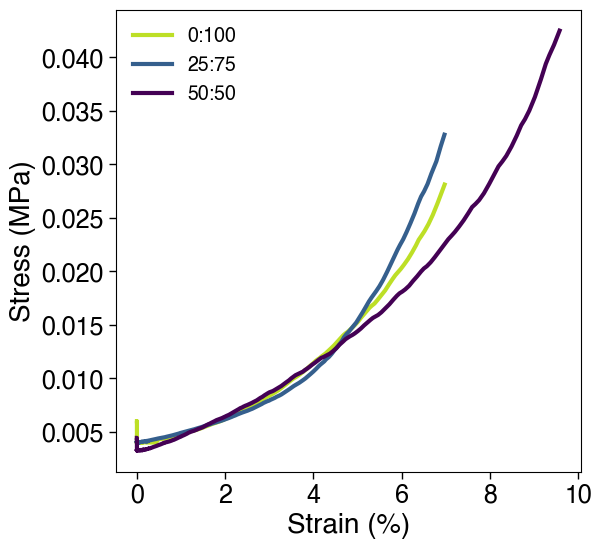

In [477]:
fig, ax = plt.subplots(figsize=(6, 6))
cmap_crosslinkers = plt.get_cmap('viridis_r')

color_HDDA0_OEGDMA100 = cmap_crosslinkers(0.1)
color_HDDA25_OEGDMA75 = cmap_crosslinkers(0.7)
color_HDDA50_OEGDMA50 = cmap_crosslinkers(1.2)

plot_HDDA0_OEGDMA100_h = ax.plot(HDDA0_OEGDMA100_strain_h_1, HDDA0_OEGDMA100_stress_h_1*1e-6, color=color_HDDA0_OEGDMA100, linewidth=3, label='0:100')

plot_HDDA25_OEGDMA75 = ax.plot(HDDA25_OEGDMA75_strain_h_1, HDDA25_OEGDMA75_stress_h_1*1e-6, color=color_HDDA25_OEGDMA75, linewidth=3, label='25:75')

plot_HDDA50_OEGDMA50 = ax.plot(HDDA50_OEGDMA50_strain_h_1, HDDA50_OEGDMA50_stress_h_1*1e-6, color=color_HDDA50_OEGDMA50, linewidth=3, label='50:50')

ax.set_ylabel('Stress (MPa)', fontsize=20)  
ax.set_xlabel('Strain (%)', fontsize=20)  
ax.legend(frameon=False, loc='best', fontsize=14)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=18)
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=18)
#ax.set_xlim(0, 16)
#ax.set_ylim(-0.01, 0.4)

#plt.savefig("Compressive strength vs strain Hencys strain rate.png", dpi=1500, bbox_inches='tight', transparent=True)

plt.show()